<a href="https://colab.research.google.com/github/carminight/fornace/blob/master/es11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Librerie necessarie
import numpy as np
import matplotlib.pyplot as plt
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from keras import backend, activations
from keras import optimizers, losses, metrics
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects
from mpl_toolkits.mplot3d import Axes3D

## Introduzione

In questo notebook è svolta l'intera esercitazione. Inoltre per semplicità alcuni risultati ottenuti sono riportati sottoforma di immagini senza rieffettuare ogni volta la costruzione e il training della Neural Networks (NN).


## Es 11.1

In questa parte dell'esercitazione viene considerata la funzione:

𝑓(𝑥)=2𝑥+1
L'obiettivo è quello di studiare la dipendenza della regressione lineare in funzione del numero di epoche 𝑁epochs, del numero di dati di train 𝑁train e dal rumore 𝜎 con il quale i dati sono stati "sporcati". Inizialmente il valore impostato è 𝜎=0

.

Si riporta di seguito la generazione dei dati esatti e di quelli che differiscono dal modello considerato. Questa parte verrà modificata ogni volta si voglia variare il numero di dati di train e la deviazione standard.

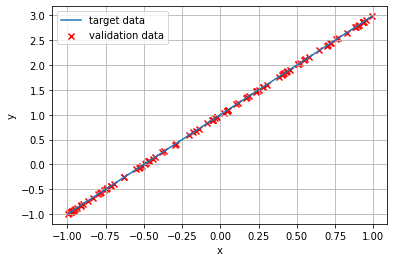

In [3]:
# target parameters of f(x) = m*x + b
m = 2 # slope
b = 1 # intersect

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 1000)  #train data
x_valid = np.random.uniform(-1, 1, 100)   #data for the validation (c.a. 10% of train data)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = 0. # noise standard deviation, for the moment it is absent
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

# plot training and target dataset
plt.plot(x_valid, y_target, label = 'target data')
plt.scatter(x_valid, y_valid, color='r', label = 'validation data', marker = 'x')
plt.xlabel ('x')
plt.ylabel ('y')
plt.legend()
plt.grid(True)
plt.show()

Di seguito viene costruita una NN sequenziale costituita da un singolo neurone con l'obiettivo di effettuare la regressione lineare oggetto dell'esercizio. Come ottimizzatore è scelto lo Stochastic Gradient Discent e come funzione costo la Mean Squared Error.

In [4]:
# compose the NN model
model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


A questo punto si procede con il training e la validazione del modello costruito sui dati di training con l'obiettivo di trovare i pesi che vadano a minimizzare la funzione costo. Questa è la parte di codice che sarà modificata ogni volta per variare il numero di epoche.


In [5]:
# fit the model using training dataset
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=50,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/50
32/32 [==============================] - 0s 9ms/step - loss: 0.7563 - mse: 0.7563 - val_loss: 0.4195 - val_mse: 0.4195
Epoch 2/50
32/32 [==============================] - 0s 1ms/step - loss: 0.2789 - mse: 0.2789 - val_loss: 0.1724 - val_mse: 0.1724
Epoch 3/50
32/32 [==============================] - 0s 2ms/step - loss: 0.1202 - mse: 0.1202 - val_loss: 0.0868 - val_mse: 0.0868
Epoch 4/50
32/32 [==============================] - 0s 1ms/step - loss: 0.0622 - mse: 0.0622 - val_loss: 0.0499 - val_mse: 0.0499
Epoch 5/50
32/32 [==============================] - 0s 1ms/step - loss: 0.0361 - mse: 0.0361 - val_loss: 0.0306 - val_mse: 0.0306
Epoch 6/50
32/32 [==============================] - 0s 2ms/step - loss: 0.0222 - mse: 0.0222 - val_loss: 0.0195 - val_mse: 0.0195
Epoch 7/50
32/32 [==============================] - 0s 2ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0126 - val_mse: 0.0126
Epoch 8/50
32/32 [==============================] - 0s 1ms/step - loss: 0.0091 - mse: 0.00

Di seguito è possibile valutare il modello su diversi dataset. Qui sono presi in considerazione i dati di validazione e quelli corretti. Vengono quindi stampati a schermo i valori della funzione costo e il valore dell' accuratezza.


In [6]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)
# print performance
print('Evaluation model with the validation data:')
print('Test loss:', score[0])
print('Test accuracy:', score[1])

print('\n')
# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)
# print performance
print('Evaluation model with the exact curve:')
print('Test loss:', score[0])
print('Test accuracy:', score[1])


4/4 [==============================] - 0s 2ms/step - loss: 1.0149e-10 - mse: 1.0149e-10
Evaluation model with the validation data:
Test loss: 1.0149204393572475e-10
Test accuracy: 1.0149204393572475e-10


4/4 [==============================] - 0s 2ms/step - loss: 1.0149e-10 - mse: 1.0149e-10
Evaluation model with the exact curve:
Test loss: 1.0149204393572475e-10
Test accuracy: 1.0149204393572475e-10


In conclusione è possibile ottenere due grafici che rappresentano rispettivamenete i valori della funzione costo per i dati di train e quelli di test in funzione del numero di epoche e una predizione effettuata con la NN appena testata.


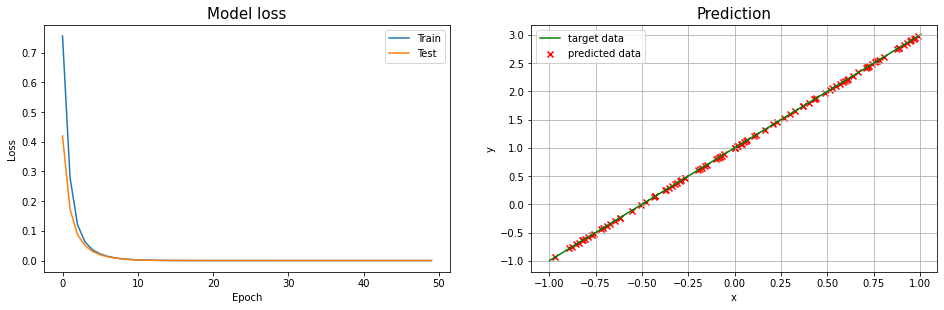

In [7]:
# look into training history
# Plot training & validation loss values
plt.figure(figsize=(16,10))
plt.subplot(2,2,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss', fontsize = 15)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')

plt.subplot(2,2,2)
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r', label ='predicted data', marker = 'x')
plt.plot(x_valid, y_target, label = 'target data', color = 'green')
plt.title("Prediction", fontsize = 15)
plt.xlabel ('x')
plt.ylabel ('y')
plt.grid(True)
plt.legend()
plt.show()

Si nota che sono stati riportati solo i casi considerati significativi trascurando molti altri tentativi risultati simili ai precenti e poco rappresentativi. In conclusione è possibile affermare che la NN implementata siccome il modello è semplice rieesce ad avere un forte potere predittivo su dati poco rumorosi, però in alcuni casi estremi incorre in un overfitting dei dati.

## Es 11.2

Lo scopo di questo esercio è quello di costruire una NN che sia in grado di effettuare un fit della funzione:

𝑓(𝑥)=4−3𝑥−2𝑥2+3𝑥3con𝑥∈[−1,1].

In questo esercizio sono stati variati i valori dei seguenti parametri:

  -  il numero di hidden layers;
  -  il numero di neuroni per layer;
  -  la funzione di attivazione;
  -  l'ottimizzatore;
  -  la loss function.

La costruzione della NN è stata effettuata considerando un numero fisso di dati di train e dati di test; nello specifico si sono considerati 104
dati di train e 103 dati di test/validation in modo tale che quelli di test fossero il 10% di quelli di train. La procedura che si è considerata è stata quella di un progressivo aumento della complessità della rete (il numero di parametri) per studiare la bontà del fit dei dati di train e le capacità della rete di fare delle predizioni. La rete neurale considerata possiede un singolo neurone sul layer di input (poichè ho una sola variabile 𝑥 come input del problema) e di uno su quello di output (ho una sola variabile 𝑓(𝑥)

in output).

Si riportano di seguito la costruzione della NN e delle considerazioni euristiche al variare dei parametri precedentemente elencati. Le modifiche apportate per ottenere i diversi step implementativi non sono mostrate poichè sono riportati solo i risultati finali. Nelle tabelle sono riportati i parametri relativi ad ogni step dove i valori in grassetto rappresentano quelli che sono stati modificati rispetto al caso precedente.

In [8]:

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 10000)
x_valid = np.random.uniform(-1, 1, 1000)
x_valid.sort()

y_target = 4 - 3*x_valid -2*x_valid**2 + 3*x_valid**3 # ideal (target) linear function

sigma = 0 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(4 - 3*x_train -2*x_train**2 + 3*x_train**3, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(4 - 3*x_valid -2*x_valid**2 + 3*x_valid**3, sigma)

In [9]:
# compose the NN model
model = Sequential()
model.add(Dense(1, input_shape=(1,)))
model.add(Dense(20, activation='tanh'))
model.add(Dense(1,))

# compile the model
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
_________________________________________________________________
dense_2 (Dense)              (None, 20)                40        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 21        
Total params: 63
Trainable params: 63
Non-trainable params: 0
_________________________________________________________________


In [10]:
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=30,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/30
313/313 [==============================] - 0s 1ms/step - loss: 0.9023 - mse: 0.9023 - val_loss: 0.4030 - val_mse: 0.4030
Epoch 2/30
313/313 [==============================] - 0s 987us/step - loss: 0.2711 - mse: 0.2711 - val_loss: 0.1646 - val_mse: 0.1646
Epoch 3/30
313/313 [==============================] - 0s 1ms/step - loss: 0.1027 - mse: 0.1027 - val_loss: 0.0543 - val_mse: 0.0543
Epoch 4/30
313/313 [==============================] - 0s 1ms/step - loss: 0.0397 - mse: 0.0397 - val_loss: 0.0290 - val_mse: 0.0290
Epoch 5/30
313/313 [==============================] - 0s 979us/step - loss: 0.0282 - mse: 0.0282 - val_loss: 0.0243 - val_mse: 0.0243
Epoch 6/30
313/313 [==============================] - 0s 1ms/step - loss: 0.0245 - mse: 0.0245 - val_loss: 0.0215 - val_mse: 0.0215
Epoch 7/30
313/313 [==============================] - 0s 976us/step - loss: 0.0219 - mse: 0.0219 - val_loss: 0.0191 - val_mse: 0.0191
Epoch 8/30
313/313 [==============================] - 0s 1ms/step - lo

Successivamente considerando l'ultimo come il modello migliore, si è provato a produrre dei dati rumorosi con una 𝜎=0.3

per testare la capacità predittiva della rete neurale. Il risultato è riportato di seguito. Si può notare che la previsione effettutua risulta essere ottima. Tuttavia provando ad aumentarla questa previsione diventa prograssivamente peggiore.

In conclusione è possibile effettuare un ulteriore test per valutare la capacità predittiva della NN, cioè testare la previsione di dati fuori dal range in cui è stato effettuato il training. Nel seguente grafico sono riportare le previsioni della rete sia all'interno sia all'esterno del range di training con i parametri utilizzati nel punto 10. Si osserva che la NN non è in grado di fare previsione corrette al di fuori del range in cui è avvenuto il training.


## Es 11.3

Questa parte dell'esercitazione consiste nel costruire una rete neurale in grado di effettuare un fit della seguente funzione trigonometrica 2D:

$𝑓(𝑥,𝑦)=sin(𝑥^2+𝑦^2)$ con $𝑥∈[−3/2,3/2]$ e $𝑦∈[−3/2,3/2]$.

La rete neurale che viene considerata è notevolmente più complesse delle precedenti data la maggior difficiltà del problema. Di seguito sono riportati i risultati ottenuti per la miglior NN identificata per risolvere il problema e non i diversi tentativi necessari per costruirla. La rete è costituita da:

Numero del layer Numero di neuroni Funzione di attivazione 1° 2 / 2° 60 relu 3° 50 tanh 4° 20 sigmoid 5° 1 /

I parametri utilizzati sono riportati nella seguente tabella:

Numero di dati di train Numero di dati di test Numero di hidden layers Numero di parametri totali Ottimizzatore Loss Fuction Numero di epoche 20000 2000 3 4277 Stochastic Gradient Discend Mean Squared Error 100

In [11]:
def sin2d(x):
    return np.sin(x[:,0]**2+x[:,1]**2)

n_train = 20000 #numero dati di training
n_valid = 2000  #numero dati di validation

x_train = np.zeros((n_train, 2))    
z_train = np.zeros((n_train, 1))  

x_valid = np.zeros((n_valid, 2))
z_valid = np.zeros((n_valid, 1))

x_train[:,0] = np.random.uniform(-3./2., 3./2., n_train)
x_train[:,1] = np.random.uniform(-3./2., 3./2., n_train)

x_valid[:,0] = np.random.uniform(-3./2., 3./2., n_valid)
x_valid[:,1] = np.random.uniform(-3./2., 3./2., n_valid)
z_target= sin2d(x_valid)

sigma = 0.2
z_train = np.random.normal(sin2d(x_train), sigma)
z_valid = np.random.normal(sin2d(x_valid), sigma)

In [12]:
model = Sequential()

model.add(Dense(2, input_shape=(2,)))

model.add(Dense(60, activation='relu'))
model.add(Dense(50, activation='tanh'))
model.add(Dense(20, activation='sigmoid'))

model.add(Dense(1))


model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model.summary()

history = model.fit(x=x_train, y=z_train, 
          batch_size=32, epochs=100,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, z_valid))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 2)                 6         
_________________________________________________________________
dense_5 (Dense)              (None, 60)                180       
_________________________________________________________________
dense_6 (Dense)              (None, 50)                3050      
_________________________________________________________________
dense_7 (Dense)              (None, 20)                1020      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 21        
Total params: 4,277
Trainable params: 4,277
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
625/625 [==============================] - 1s 1ms/step - loss: 0.1905 - mse: 0.1905 - val_loss: 0.1932 - v

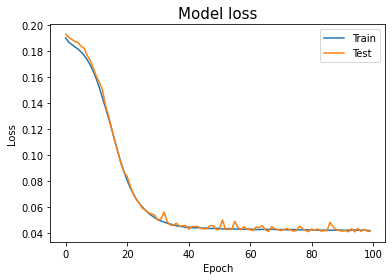

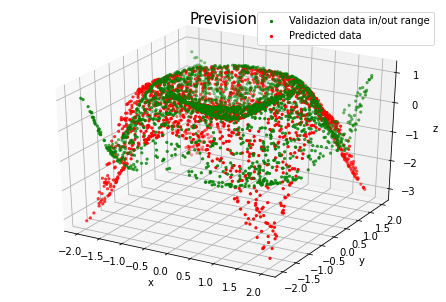

In [13]:
plt.figure(figsize=(6,4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss', fontsize = 15)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')

n_predicted = 2000
x_predicted = np.zeros((n_predicted, 2))    #matrice (x,y)
z_predicted = np.zeros((n_predicted))
x_predicted[:,0] = np.random.uniform(-4./2., 4./2., n_predicted)
x_predicted[:,1] = np.random.uniform(-4./2., 4./2., n_predicted)
z_predicted= model.predict(x_predicted)

n_train = 20000 #numero dati di training
n_valid = 2000  #numero dati di validation

fig = plt.figure()
ax = Axes3D(fig)
x_valid[:,0] = np.random.uniform(-4./2., 4./2., n_valid)
x_valid[:,1] = np.random.uniform(-4./2., 4./2., n_valid)
z_target= sin2d(x_valid)
ax.scatter(x_valid[:,0], x_valid[:,1],z_target, c='green', marker='.', label = 'Validazion data in/out range')
ax.scatter(x_predicted[:,0], x_predicted[:,1],z_predicted, c='red', marker='.',label = 'Predicted data')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.legend()
ax.set_title("Prevision", fontsize = 15)
plt.show()

Nell' ultimo grafico sono riportate le previsioni della rete neurale sia all'interno $([−3/2,3/2])$ che all'esterno $([−4/2,4/2])$ del range di training. Si può notare che le previsioni all'interno del range sono ottime, ma al di fuori come nel caso precedente le previsioni peggiorano fino a sbagliare completamente tanto più ci si allontana dal range di training.